In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import math
import random

In [37]:
functions = [lambda x : x, 
             lambda x : 101 - x,
             lambda x : 50.5 + 49.5 * math.sin(math.pi / 2 + x / (5 * math.pi)),
             lambda x : random.randint(1, 101)]

In [38]:
points = []
xs = []
ys = []
for i in range(50):
    x = random.randint(1,101)
    y = functions[2](x)
#     print(x, y)
    points.append((x,y))
    xs.append(x)
    ys.append(y)

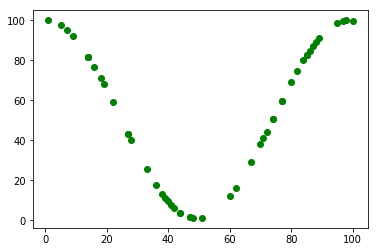

In [39]:
plt.figure()
plt.scatter(xs, ys, color="green")

In [5]:
def plot_function(func_num, plot=True):
    """
    Plot 50 (x,y) pairs for given function
    """
    points = []
    xs = []
    ys = []
    colors = ['maroon', 'blue', 'green', 'orange']
    for i in range(50):
        x = random.randint(1,101)
        y = functions[func_num](x)
    #     print(x, y)
        points.append((x,y))
        xs.append(x)
        ys.append(y)
    if plot:
        plt.figure()
        plt.scatter(xs, ys, color=colors[func_num])
    return (xs, ys)

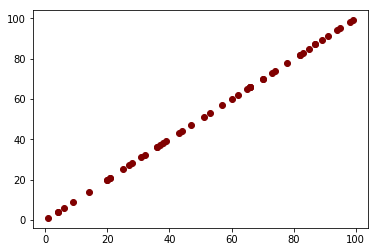

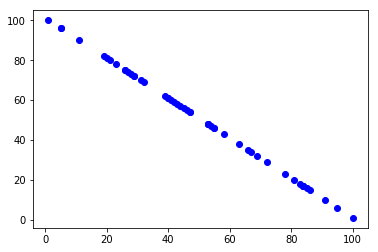

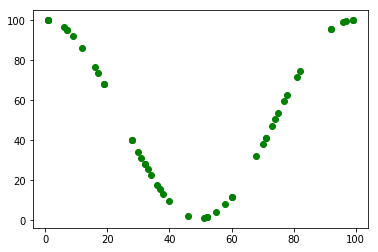

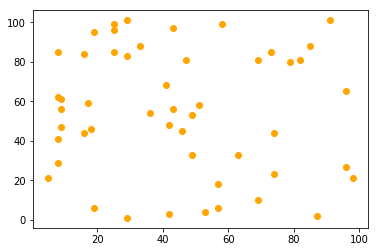

In [6]:
for i in range(4):
    plot_function(i)

In [19]:
def graph_normal(mu, sigma):
    # uncomment this code to graph the normal distribution 

    count, bins, ignored = plt.hist(a, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
             linewidth=2, color='r')
    plt.show()

In [21]:
# mu, sigma = 0, 1 # mean and standard deviation
a = np.random.normal(1, 1, 1000)
b = np.random.normal(0, 1, 1000)

In [36]:
asum= 0
for i in range(25):
    asum += a[random.randint(0,len(a)-1)]
print(asum/25)

0.9209270954092594


In [41]:
# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=False)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []
for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
#     print(x,y)
    mu 